#### Data Collection

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/Users/HOME/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
house_data = pd.read_csv("train.csv")
house_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
test_data = pd.read_csv("test.csv")
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [4]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
house_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [6]:
house_data.select_dtypes('number').T

,0,1,2,3,4,5,6,7,8,9,...,1450,1451,1452,1453,1454,1455,1456,1457,1458,1459
Id,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,1451.0,1452.0,1453.0,1454.0,1455.0,1456.0,1457.0,1458.0,1459.0,1460.0
MSSubClass,60.0,20.0,60.0,70.0,60.0,50.0,20.0,60.0,50.0,190.0,...,90.0,20.0,180.0,20.0,20.0,60.0,20.0,70.0,20.0,20.0
LotFrontage,65.0,80.0,68.0,60.0,84.0,85.0,75.0,NaN,51.0,50.0,...,60.0,78.0,35.0,90.0,62.0,62.0,85.0,66.0,68.0,75.0
LotArea,8450.0,9600.0,11250.0,9550.0,14260.0,14115.0,10084.0,10382.0,6120.0,7420.0,...,9000.0,9262.0,3675.0,17217.0,7500.0,7917.0,13175.0,9042.0,9717.0,9937.0
OverallQual,7.0,6.0,7.0,7.0,8.0,5.0,8.0,7.0,7.0,5.0,...,5.0,8.0,5.0,5.0,7.0,6.0,6.0,7.0,5.0,5.0
OverallCond,5.0,8.0,5.0,5.0,5.0,5.0,5.0,6.0,5.0,6.0,...,5.0,5.0,5.0,5.0,5.0,5.0,6.0,9.0,6.0,6.0
YearBuilt,2003.0,1976.0,2001.0,1915.0,2000.0,1993.0,2004.0,1973.0,1931.0,1939.0,...,1974.0,2008.0,2005.0,2006.0,2004.0,1999.0,1978.0,1941.0,1950.0,1965.0
YearRemodAdd,2003.0,1976.0,2002.0,1970.0,2000.0,1995.0,2005.0,1973.0,1950.0,1950.0,...,1974.0,2009.0,2005.0,2006.0,2005.0,2000.0,1988.0,2006.0,1996.0,1965.0
MasVnrArea,196.0,0.0,162.0,0.0,350.0,0.0,186.0,240.0,0.0,0.0,...,0.0,194.0,80.0,0.0,0.0,0.0,119.0,0.0,0.0,0.0
BsmtFinSF1,706.0,978.0,486.0,216.0,655.0,732.0,1369.0,859.0,0.0,851.0,...,0.0,0.0,547.0,0.0,410.0,0.0,790.0,275.0,49.0,830.0


In [14]:
#number of numerical columns
len(house_data.select_dtypes('number').columns.to_list())

38

In [15]:
#number of categorical columns
len(house_data.select_dtypes('object').columns.to_list())

43

In [18]:
house_data.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [20]:
house_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [60]:
#Checking for missing values
house_data.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [51]:
#checking for the missing values percentages
missing_percentage = house_data.isna().sum() * 100 / len(house_data)
missing_percent_df = pd.DataFrame({'columns': house_data.columns,'missing_percentage':missing_percentage})

In [59]:
pd.set_option("display.max_rows",None,'display.max_columns',None)
missing_percent_df

,columns,missing_percentage
Id,Id,0.000000
MSSubClass,MSSubClass,0.000000
MSZoning,MSZoning,0.000000
LotFrontage,LotFrontage,17.739726
LotArea,LotArea,0.000000
Street,Street,0.000000
Alley,Alley,93.767123
LotShape,LotShape,0.000000
LandContour,LandContour,0.000000
Utilities,Utilities,0.000000


#### Handling the missing values

In [69]:
house_data['Alley'].fillna('No alley access',inplace = True)

In [74]:
house_data['FireplaceQu'].fillna('No Fireplace',inplace = True)
house_data['GarageType'].fillna('No Garage',inplace = True)
house_data['GarageYrBlt'].fillna(0,inplace = True)
house_data['GarageFinish'].fillna('No Garage',inplace = True)
house_data['GarageQual'].fillna('No Garage',inplace = True)
house_data['GarageCond'].fillna('No Garage',inplace = True)
house_data['PoolQC'].fillna('No Pool',inplace = True)
house_data['Fence'].fillna("No Fence",inplace = True)
house_data['MiscFeature'].fillna('OTHER',inplace = True)

In [92]:
house_data['LotFrontage'].fillna(house_data['LotFrontage'].mean(),inplace = True)
house_data['MasVnrType'].fillna('OTHER',inplace = True)
house_data['MasVnrArea'].fillna(house_data['MasVnrArea'].mean(),inplace = True)
house_data['BsmtQual'].fillna('No Basement',inplace = True)
house_data['BsmtCond'].fillna('No Basement',inplace = True)
house_data['BsmtExposure'].fillna('No Basement',inplace = True)
house_data['BsmtFinType1'].fillna('No Basement',inplace = True)
house_data['BsmtFinType2'].fillna('No Basement',inplace = True)
house_data['Electrical'].fillna('SBrkr',inplace = True)

In [91]:
house_data['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [90]:
house_data[house_data['Electrical'].isna()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1379,1380,80,RL,73.0,9735,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,SLvl,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,384,384,GasA,Gd,Y,NaN,754,640,0,1394,0,0,2,1,3,1,Gd,7,Typ,0,No Fireplace,BuiltIn,2007.0,Fin,2,400,TA,TA,Y,100,0,0,0,0,0,No Pool,No Fence,None,0,5,2008,WD,Normal,167500


In [94]:
house_data.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr

In [45]:
house_data.shape[0]

1460

In [44]:
len(house_data)

1460

In [96]:
house_data.count()

Id               1460
MSSubClass       1460
MSZoning         1460
LotFrontage      1460
LotArea          1460
Street           1460
Alley            1460
LotShape         1460
LandContour      1460
Utilities        1460
LotConfig        1460
LandSlope        1460
Neighborhood     1460
Condition1       1460
Condition2       1460
BldgType         1460
HouseStyle       1460
OverallQual      1460
OverallCond      1460
YearBuilt        1460
YearRemodAdd     1460
RoofStyle        1460
RoofMatl         1460
Exterior1st      1460
Exterior2nd      1460
MasVnrType       1460
MasVnrArea       1460
ExterQual        1460
ExterCond        1460
Foundation       1460
BsmtQual         1460
BsmtCond         1460
BsmtExposure     1460
BsmtFinType1     1460
BsmtFinSF1       1460
BsmtFinType2     1460
BsmtFinSF2       1460
BsmtUnfSF        1460
TotalBsmtSF      1460
Heating          1460
HeatingQC        1460
CentralAir       1460
Electrical       1460
1stFlrSF         1460
2ndFlrSF         1460
LowQualFin

#### Checking the multicollinearity

In [97]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [98]:
house_data.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.009601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050199,-0.005024,-0.005968,-0.007940,-0.015415,0.010496,0.005590,-0.044230,0.008273,0.002289,-0.020155,0.005587,0.006784,0.037719,0.002951,0.027239,-0.019772,0.013491,0.016570,0.017634,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.357056,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022895,-0.069836,-0.065649,-0.140759,-0.238518,-0.251758,0.307886,0.046474,0.074853,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,0.040380,-0.045569,-0.080997,-0.040110,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.009601,-0.357056,1.000000,0.306795,0.234196,-0.052820,0.117598,0.082746,0.179283,0.215828,0.043340,0.122156,0.363358,0.414266,0.072483,0.036849,0.368392,0.091481,-0.006419,0.180424,0.048258,0.237023,-0.005805,0.320146,0.235755,0.100259,0.269729,0.323663,0.077106,0.137454,0.009790,0.062335,0.037684,0.180868,0.001168,0.010158,0.006768,0.334901
LotArea,-0.033226,-0.139781,0.306795,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103960,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,0.072599,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.234196,0.105806,1.000000,-0.091932,0.572323,0.550684,0.410238,0.239666,-0.059119,0.308159,0.537808,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.288998,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.052820,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.127788,-0.046231,0.040229,-0.136841,-0.171098,-0.144203,0.028942,0.025494,-0.079686,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.057583,-0.023820,-0.006515,-0.185758,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.117598,0.014228,0.572323,-0.375983,1.000000,0.592855,0.314745,0.249503,-0.049107,0.149040,0.391452,0.281986,0.010308,-0.183784,0.199010,0.187599,-0.038162,0.468271,0.242656,-0.070651,-0.174800,0.095589,0.147716,0.272029,0.537850,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.082746,0.013788,0.550684,0.073741,0.592855,1.000000,0.179186,0.128451,-0.067759,0.181133,0.291066,0.240379,0.140024,-0.062419,0.287389,0.119470,-0.012337,0.439046,0.183331,-0.040581,-0.149598,0.191740,0.112581,0.146357,0.420622,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050199,0.022895,0.179283,0.103960,0.410238,-0.127788,0.314745,0.179186,1.000000,0.263582,-0.072302,0.114184,0.362452,0.342160,0.174019,-0.069068,0.389893,0.085055,0.026669,0.275730,0.200802,0.102417,-0.037364,0.280027,0.247906,0.133734,0.363778,0.372567,0.159349,0.124965,-0.109849,0.018795,0.061453,0.011723,-0.029815,-0.005940,-0.008184,0.475241
BsmtFinSF1,-0.005024,-0.069836,0.215828,0.214103,0.239666,-0.046231,0.249503,0.128451,0.263582,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.115843,0.224054,0.296970,0.204306,0.111761,-0.102303,0.026451

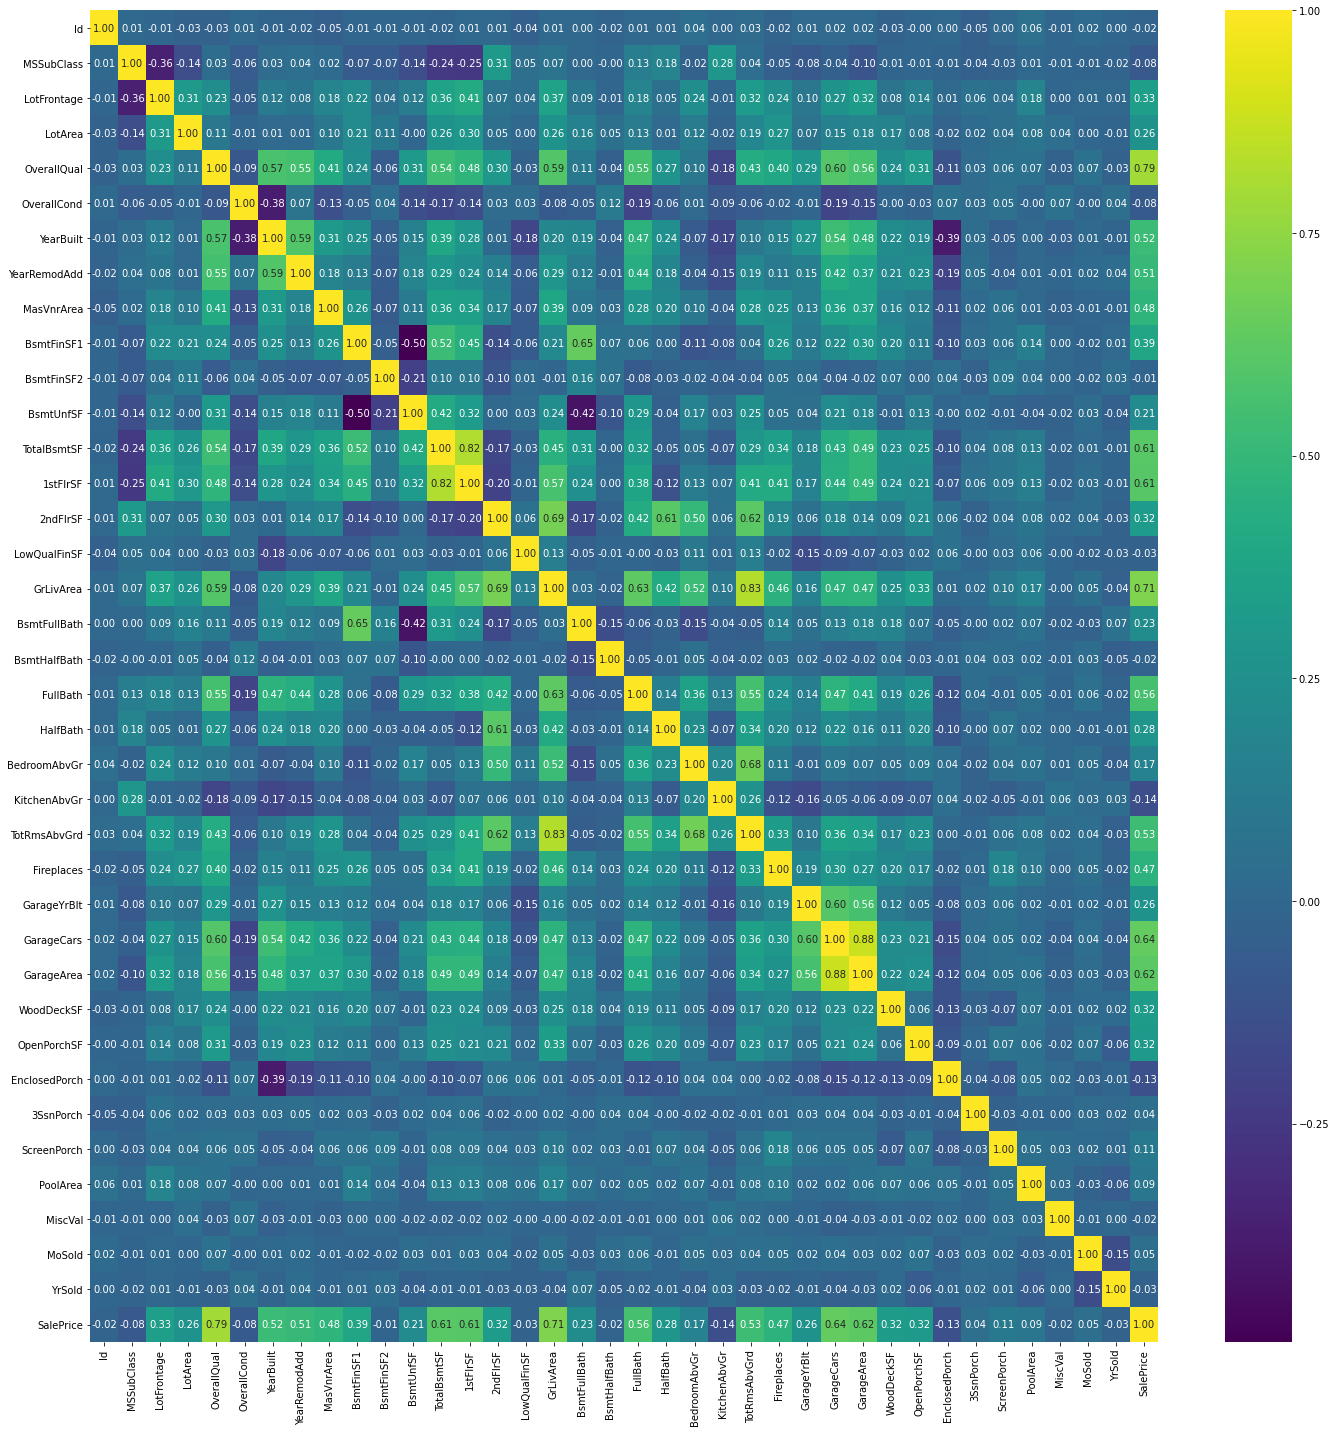

In [100]:
# Plotting the heatmap for better visual representation
plt.figure(figsize=(20,20))
sns.heatmap(house_data.corr(), annot=True, fmt='.2f', cmap='viridis')
plt.tight_layout()
plt.show()


In [102]:
import numpy as np
# Call the variable corr_matrix
corr_matrix= house_data.drop(['SalePrice'], axis=1).corr().abs()

# Get the upper triangle of the correlation matrix 
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# This code iterates through our columns and gets the index of any that have a correlation > 0.95
# Call the variable to_drop, get the columns of our 'upper' variable, make sure the threshold is 0.95.
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

In [104]:
print("Features selected to drop include:",to_drop)

Features selected to drop include: []


In [109]:
house_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [110]:
house_data['MSSubClass'] = house_data['MSSubClass'].astype("str")

In [112]:
house_data['MSSubClass'].dtype

dtype('O')

In [116]:
#Replacing the 'MSSubClass' values with the actual description
replace_values = {"20" : "1-STORY 1946 & NEWER ALL STYLES",
        "30" : "1-STORY 1945 & OLDER",
        "40" : "1-STORY W/FINISHED ATTIC ALL AGES",
        "45" : "1-1/2 STORY - UNFINISHED ALL AGES",
        "50" : "1-1/2 STORY FINISHED ALL AGES",
        "60" : "2-STORY 1946 & NEWER",
        "70" : "2-STORY 1945 & OLDER",
        "75" : "2-1/2 STORY ALL AGES",
        "80" : "SPLIT OR MULTI-LEVEL",
        "85" : "SPLIT FOYER",
        "90" : "DUPLEX - ALL STYLES AND AGES",
       "120" : "1-STORY PUD (Planned Unit Development) - 1946 & NEWER",
       "150" : "1-1/2 STORY PUD - ALL AGES",
       "160" : "2-STORY PUD - 1946 & NEWER",
       "180" : "PUD - MULTILEVEL - INCL SPLIT LEV/FOYER",
       "190" : "2 FAMILY CONVERSION - ALL STYLES AND AGES"}
house_data = house_data.replace({'MSSubClass': replace_values})

In [118]:
#Replacing the 'MSZoning' values with the actual description
replace_values = {"A" : "Agriculture",
       "C" : "Commercial",
       "FV" : "Floating Village Residential",
       "I" : "Industrial",
       "RH" : "Residential High Density",
       "RL" : "Residential Low Density",
       "RP" : "Residential Low Density Park", 
       "RM" : "Residential Medium Density"}
house_data = house_data.replace({'MSZoning': replace_values})

In [119]:
#Replacing the 'Street' values with the actual description
replace_values = {"Grvl": "Gravel",
                   "Pave" : "Paved"}
house_data = house_data.replace({'Street': replace_values})

In [120]:
#Replacing the 'Alley' values with the actual description
replace_values =  {"Grvl": "Gravel",
       "Pave" : "Paved"}
house_data = house_data.replace({'Alley': replace_values})

In [121]:
#Replacing the 'LotShape' values with the actual description
replace_values = {"Reg" : "Regular",
                  "IR1" : "Slightly irregular",
                  "IR2" : "Moderately Irregular",
                  "IR3" : "Irregular"}
house_data = house_data.replace({'LotShape': replace_values})

In [122]:
#Replacing the 'LandContour' values with the actual description
replace_values = {"Lvl" : "Near Flat/Level",
       "Bnk" : "Banked - Quick and significant rise from street grade to building",
       "HLS" : "Hillside - Significant slope from side to side",
       "Low" : "Depression"}
house_data = house_data.replace({'LandContour': replace_values})

In [123]:
#Replacing the 'Utilities' values with the actual description
replace_values = {"AllPub" : "All public Utilities (E,G,W,& S)",
       "NoSewr" : "Electricity, Gas, and Water (Septic Tank)",
       "NoSeWa" : "Electricity and Gas Only",
       "ELO" : "Electricity only"}
house_data = house_data.replace({'Utilities': replace_values})

In [124]:
#Replacing the 'LotConfig' values with the actual description
replace_values = {"Inside" : "Inside lot",
       "Corner" : "Corner lot",
       "CulDSac" : "Cul-de-sac",
       "FR2" : "Frontage on 2 sides of property",
       "FR3" : "Frontage on 3 sides of property"}
house_data = house_data.replace({'LotConfig': replace_values})

In [125]:
#Replacing the 'LandSlope' values with the actual description
replace_values = {"Gtl" : "Gentle slope",
       "Mod" : "Moderate Slope",
       "Sev" : "Severe Slope"}
house_data = house_data.replace({'LandSlope': replace_values})

In [126]:
#Replacing the 'Neighborhood' values with the actual description
replace_values = {"Blmngtn" : "Bloomington Heights",
       "Blueste" : "Bluestem",
       "BrDale" : "Briardale",
       "BrkSide" : "Brookside",
       "ClearCr" : "Clear Creek",
       "CollgCr" : "College Creek",
       "Crawfor" : "Crawford",
       "Edwards" : "Edwards",
       "Gilbert" : "Gilbert",
       "IDOTRR" : "Iowa DOT and Rail Road",
       "MeadowV" : "Meadow Village",
       "Mitchel" : "Mitchell",
       "Names" : "North Ames",
       "NoRidge" : "Northridge",
       "NPkVill" : "Northpark Villa",
       "NridgHt" : "Northridge Heights",
       "NWAmes" : "Northwest Ames",
       "OldTown" : "Old Town",
       "SWISU" : "South & West of Iowa State University",
       "Sawyer" : "Sawyer",
       "SawyerW" : "Sawyer West",
       "Somerst" : "Somerset",
       "StoneBr" : "Stone Brook",
       "Timber" : "Timberland",
       "Veenker" : "Veenker"}
house_data = house_data.replace({'Neighborhood': replace_values})

In [128]:
#Replacing the 'Condition1' values with the actual description
replace_values = {"Artery" : "Adjacent to arterial street",
       "Feedr": "Adjacent to feeder street",
       "Norm" : "Normal",
       "RRNn" : "Within 200' of North-South Railroad",
       "RRAn" : "Adjacent to North-South Railroad",
       "PosN" : "Near positive off-site feature--park, greenbelt, etc.",
       "PosA" : "Adjacent to postive off-site feature",
       "RRNe" : "Within 200' of East-West Railroad",
       "RRAe" : "Adjacent to East-West Railroad"}
house_data = house_data.replace({'Condition1': replace_values})

In [129]:
#Replacing the 'Condition2' values with the actual description
replace_values = {"Artery" : "Adjacent to arterial street",
       "Feedr": "Adjacent to feeder street",
       "Norm" : "Normal",
       "RRNn" : "Within 200' of North-South Railroad",
       "RRAn" : "Adjacent to North-South Railroad",
       "PosN" : "Near positive off-site feature--park, greenbelt, etc.",
       "PosA" : "Adjacent to postive off-site feature",
       "RRNe" : "Within 200' of East-West Railroad",
       "RRAe" : "Adjacent to East-West Railroad"}
house_data = house_data.replace({'Condition2': replace_values})

In [131]:
#Replacing the 'BldgTyp' values with the actual description
replace_values = {"1Fam" : "Single-family Detached",
       "2FmCon": "Two-family Conversion; originally built as one-family dwelling",
       "Duplx" : "Duplex",
       "TwnhsE" : "Townhouse End Unit",
       "TwnhsI" : "Townhouse Inside Unit"}
house_data = house_data.replace({'BldgTyp': replace_values})

In [132]:
#Replacing the 'HouseStyle' values with the actual description
replace_values = {"1Story" : "One story",
       "1.5Fin" : "One and one-half story: 2nd level finished",
       "1.5Unf" : "One and one-half story: 2nd level unfinished",
       "2Story" : "Two story",
       "2.5Fin" : "Two and one-half story: 2nd level finished",
       "2.5Unf" : "Two and one-half story: 2nd level unfinished",
       "SFoyer" : "Split Foyer",
       "SLvl" : "Split Level"}
house_data = house_data.replace({'HouseStyle': replace_values})

In [137]:
house_data['OverallQual'] = house_data['OverallQual'].astype('str')

In [138]:
#Replacing the 'OverallQual' values with the actual description
replace_values = {"10" : "Very Excellent",
       "9" : "Excellent",
       "8" : "Very Good",
       "7" : "Good",
       "6" : "Above Average",
       "5" : "Average",
       "4" : "Below Average",
       "3" : "Fair",
       "2" : "Poor",
       "1" : "Very Poor"}
house_data = house_data.replace({'OverallQual': replace_values})

In [139]:
house_data['OverallCond'] = house_data['OverallCond'].astype('str')
#Replacing the 'OverallCond' values with the actual description
replace_values = {"10" : "Very Excellent",
       "9" : "Excellent",
       "8" : "Very Good",
       "7" : "Good",
       "6" : "Above Average",
       "5" : "Average",
       "4" : "Below Average",
       "3" : "Fair",
       "2" : "Poor",
       "1" : "Very Poor"}
house_data = house_data.replace({'OverallCond': replace_values})

In [140]:
#Replacing the 'RoofMatl' values with the actual description
replace_values = {"ClyTile" : "Clay or Tile",
       "CompShg" : "Standard (Composite) Shingle",
       "Membran" : "Membrane",
       "Metal" : "Metal",
       "Roll" : "Roll",
       "Tar&Grv" : "Gravel & Tar",
       "WdShake" : "Wood Shakes",
       "WdShngl" : "Wood Shingles"}
house_data = house_data.replace({'RoofMatl': replace_values})

In [141]:
#Replacing the 'Exterior1st' values with the actual description
replace_values = {"AsbShng" : "Asbestos Shingles",
       "AsphShn" : "Asphalt Shingles",
       "BrkComm" : "Brick Common",
       "BrkFace" : "Brick Face",
       "CBlock" :  "Cinder Block",
       "CemntBd" : "Cement Board",
       "HdBoard" : "Hard Board",
       "ImStucc" : "Imitation Stucco",
       "MetalSd" : "Metal Siding",
       "Other" : "Other",
       "Plywood" : "Plywood",
       "PreCast" : "PreCast",
       "Stone" : "Stone",
       "Stucco" : "Stucco",
       "VinylSd" : "Vinyl Siding",
       "Wd Sdng" : "Wood Siding",
       "WdShing" : "Wood Shingles"}
house_data = house_data.replace({'Exterior1st': replace_values})

In [142]:
#Replacing the 'Exterior2nd' values with the actual description
replace_values = {"AsbShng" : "Asbestos Shingles",
       "AsphShn" : "Asphalt Shingles",
       "BrkComm" : "Brick Common",
       "BrkFace" : "Brick Face",
       "CBlock" :  "Cinder Block",
       "CemntBd" : "Cement Board",
       "HdBoard" : "Hard Board",
       "ImStucc" : "Imitation Stucco",
       "MetalSd" : "Metal Siding",
       "Other" : "Other",
       "Plywood" : "Plywood",
       "PreCast" : "PreCast",
       "Stone" : "Stone",
       "Stucco" : "Stucco",
       "VinylSd" : "Vinyl Siding",
       "Wd Sdng" : "Wood Siding",
       "WdShing" : "Wood Shingles"}
house_data = house_data.replace({'Exterior2nd': replace_values})

In [143]:
#Replacing the 'MasVnrType' values with the actual description
replace_values = {"BrkCmn" : "Brick Common",
       "BrkFace" : "Brick Face",
       "CBlock" : "Cinder Block",
       "Stone" : "Stone"}
house_data = house_data.replace({'MasVnrType': replace_values})

In [144]:
#Replacing the 'ExterQual' values with the actual description
replace_values = {"Ex" : "Excellent",
       "Gd" : "Good",
       "TA" : "Average/Typical",
       "Fa" : "Fair",
       "Po" : "Poor"}
house_data = house_data.replace({'ExterQual': replace_values})

In [145]:
#Replacing the 'ExterCond' values with the actual description
replace_values = {"Ex" : "Excellent",
       "Gd" : "Good",
       "TA" : "Average/Typical",
       "Fa" : "Fair",
       "Po" : "Poor"}
house_data = house_data.replace({'ExterCond': replace_values})

In [146]:
#Replacing the 'Foundation' values with the actual description
replace_values = {"BrkTil" : "Brick & Tile",
       "CBlock" : "Cinder Block",
       "PConc" : "Poured Contrete",
       "Slab" : "Slab",
       "Stone" : "Stone",
       "Wood" : "Wood"}
house_data = house_data.replace({'Foundation': replace_values})

In [147]:
#Replacing the 'BsmtQual' values with the actual description
replace_values = {"Ex" : "Excellent",
       "Gd" : "Good",
       "TA" : "Typical",
       "Fa" : "Fair",
       "Po" : "Poor"}
house_data = house_data.replace({'BsmtQual': replace_values})

In [148]:
#Replacing the 'BsmtCond' values with the actual description
replace_values = {"Ex" : "Excellent",
       "Gd" : "Good",
       "TA" : "Typical",
       "Fa" : "Fair",
       "Po" : "Poor"}
house_data = house_data.replace({'BsmtCond': replace_values})

In [149]:
#Replacing the 'BsmtExposur' values with the actual description
replace_values = {"Gd" : "Good Exposure",
       "Av" : "Average Exposure", 
       "Mn" : "Mimimum Exposure",
       "No" : "No Exposure"}
house_data = house_data.replace({'BsmtExposur': replace_values})

In [150]:
#Replacing the 'BsmtFinType1' values with the actual description
replace_values = {"GLQ" : "Good Living Quarters",
       "ALQ" : "Average Living Quarters",
       "BLQ" : "Below Average Living Quarters",
       "Rec" : "Average Rec Room",
       "LwQ" : "Low Quality",
       "Unf" : "Unfinshed"}
house_data = house_data.replace({'BsmtFinType1': replace_values})

In [152]:
#Replacing the 'BsmtFinType2' values with the actual description
replace_values = {"GLQ" : "Good Living Quarters",
       "ALQ" : "Average Living Quarters",
       "BLQ" : "Below Average Living Quarters",
       "Rec" : "Average Rec Room",
       "LwQ" : "Low Quality",
       "Unf" : "Unfinshed"}
house_data = house_data.replace({'BsmtFinType2': replace_values})

In [153]:
#Replacing the 'Heating' values with the actual description
replace_values = {"Floor" : "Floor Furnace",
       "GasA" : "Gas forced warm air furnace",
       "GasW" : "Gas hot water or steam heat",
       "Grav" : "Gravity furnace",
       "OthW" : "Hot water or steam heat other than gas",
       "Wall" : "Wall furnace"}
house_data = house_data.replace({'Heating': replace_values})

In [154]:
#Replacing the 'HeatingQC' values with the actual description
replace_values = {"Ex" : "Excellent",
       "Gd" : "Good",
       "TA" : "Average/Typical",
       "Fa" : "Fair",
       "Po" : "Poor"}
house_data = house_data.replace({'HeatingQC': replace_values})

In [155]:
#Replacing the 'CentralAir' values with the actual description
replace_values = {"N" : "No",
       "Y" :  "Yes"}
house_data = house_data.replace({'CentralAir': replace_values})

In [157]:
#Replacing the 'KitchenQual' values with the actual description
replace_values = {"Ex" : "Excellent",
       "Gd" : "Good",
       "TA" : "Typical/Average",
       "Fa" : "Fair",
       "Po" : "Poor"}
house_data = house_data.replace({'KitchenQual': replace_values})

In [158]:
#Replacing the 'PavedDrive' values with the actual description
replace_values = {"Y" : "Paved", 
       "P" : "Partial Pavement",
       "N" : "Dirt/Gravel"}
house_data = house_data.replace({'PavedDrive': replace_values})

In [159]:
#Replacing the 'Fence' values with the actual description
replace_values = {"GdPrv" : "Good Privacy",
       "MnPrv" : "Minimum Privacy",
       "GdWo" : "Good Wood",
       "MnWw" : "Minimum Wood/Wire"}
house_data = house_data.replace({'Fence': replace_values})

In [160]:
#Replacing the 'SaleType' values with the actual description
replace_values = {"WD" : "Warranty Deed - Conventional",
       "CWD" :  "Warranty Deed - Cash",
       "VWD" : "Warranty Deed - VA Loan",
       "New" : "Home just constructed and sold",
       "COD" : "Court Officer Deed/Estate",
       "Con" : "Contract 15% Down payment regular terms",
       "ConLw" : "Contract Low Down payment and low interest",
       "ConLI" : "Contract Low Interest",
       "ConLD" : "Contract Low Down",
       "Oth" : "Other"}
house_data = house_data.replace({'SaleType': replace_values})

In [161]:
house_data.to_csv("house_data.csv")